In [36]:
import graphviz
import requests
import json
from json.decoder import JSONDecodeError
from IPython.display import Image
import graphviz


# Parameters

In [37]:
param = "PV-voltage"
baseURL = 'http://solarprotocol.net/api/v2/opendata.php?line=0'
offLineData = "../../data/0-single-value.json"

ccValue = ""


# Functions

In [38]:
def getCCData(ccValue):
    try:
        x = requests.get(baseURL+ccValue,timeout=5)
        print("API charge controller data:")
        print(x.text)
        x.json()
        return json.loads(x.text)
    except JSONDecodeError as errj:
        print("A JSON decode error:" + repr(errj))
    except requests.exceptions.HTTPError as errh:
        print("An Http Error occurred:" + repr(errh))
    except requests.exceptions.ConnectionError as errc:
        print("An Error Connecting to the API occurred:" + repr(errc))
    except requests.exceptions.Timeout as errt:
        print("A Timeout Error occurred:" + repr(errt))
    except requests.exceptions.RequestException as err:
        print("An Unknown Error occurred" + repr(err))

# Get data

Possible data:

    PV-current
    PV-current
    PV-power-H
    PV-power-L
    PV-voltage
    battery-percentage
    battery-voltage
    charge-current
    charge-power-H
    charge-power-L
    load-current
    load-power
    load-voltage
    datetime
    scaled-wattage


In [39]:
getResult = getCCData("battery-percentage")   

API charge controller data:
{"0battery-percentage":{"datetime":"2022-03-13 14:37:43.764754","PV-voltage":"18.44","PV-current":"1.57","PV-power-L":"29.09","PV-power-H":"0.0","battery-voltage":"13.99","battery-current":"2.08","battery-power-L":"29.09","battery-power-H":"0.0","load-voltage":"13.99","load-current":"0.19","load-power":"2.65","battery-percentage":"1.0"},"timezone":"Europe/Berlin"}


In [40]:
print(getResult)

{'0battery-percentage': {'datetime': '2022-03-13 14:37:43.764754', 'PV-voltage': '18.44', 'PV-current': '1.57', 'PV-power-L': '29.09', 'PV-power-H': '0.0', 'battery-voltage': '13.99', 'battery-current': '2.08', 'battery-power-L': '29.09', 'battery-power-H': '0.0', 'load-voltage': '13.99', 'load-current': '0.19', 'load-power': '2.65', 'battery-percentage': '1.0'}, 'timezone': 'Europe/Berlin'}


In [41]:
list_values = list(getResult.values())[0]
list_values

{'datetime': '2022-03-13 14:37:43.764754',
 'PV-voltage': '18.44',
 'PV-current': '1.57',
 'PV-power-L': '29.09',
 'PV-power-H': '0.0',
 'battery-voltage': '13.99',
 'battery-current': '2.08',
 'battery-power-L': '29.09',
 'battery-power-H': '0.0',
 'load-voltage': '13.99',
 'load-current': '0.19',
 'load-power': '2.65',
 'battery-percentage': '1.0'}

# Get values from data

In [42]:
name = list(list_values.keys())[1]
PV_voltage = list(list_values.values())[1]
battery_voltage = list(list_values.values())[5]
battery_percentage = list(list_values.values())[12]
battery_percentage= float(battery_percentage)*100
battery_percentage=str(battery_percentage)
name

'PV-voltage'

In [43]:
param


'PV-voltage'

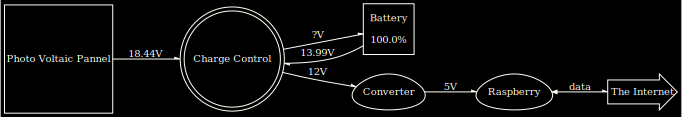

In [44]:
dot = graphviz.Digraph(comment='Current Solar Protocol')
dot = graphviz.Digraph(graph_attr={'rankdir':'LR','bgcolor':'black'})

dot.attr(style='filled', color='lightgrey')
dot.attr('node', shape='circle',color='#FFFFF5', fontcolor='#FFFFF5',fontname="garamond",fontsize="10")
dot.node('PV', 'Photo Voltaic Pannel', shape="square")
dot.node('B', 'Battery \n\n'+battery_percentage+'%', shape="square")
dot.node('C', 'Converter', shape="egg")
dot.node('R', 'Raspberry', shape="egg")
dot.node('I', 'The Internet', shape="rarrow")


dot.attr('node', shape='doublecircle')
dot.node('CC', 'Charge Control')

dot.edge('PV', 'CC', label=PV_voltage+"V")
dot.edge('B', 'CC', label=battery_voltage+"V")
dot.edge('CC', 'B', label="?"+"V")
dot.edge('CC', 'C', label='12V', shape="egg")
dot.edge('C', 'R', label=' 5V', shape="egg")
dot.edge('R', 'I', label='data', shape="egg",dir="both")

dot.edge_attr.update(arrowhead='lnormal', arrowsize='0.5', color="#FFFFF5", fontcolor='#FFFFF5',fontname="garamond",fontsize="10")
dot


Made for Solar Protocol by Guillaume Slizewicz during Fiber Natural Intelligences Lab